In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

ROOT_FOLDER = "to_evaluate"
SIMPLE_METRIC_FILENAME = "simple_metric_results.xlsx"

In [2]:
def extract_results(exp_names:list, _exp_type:str, _root_folder:str=ROOT_FOLDER):
    idxs = list(itertools.product(exp_names, [0,1,2,3,4,5,6]))
    multi_index = pd.MultiIndex.from_tuples(idxs)
    _df_data = []

    for exp_name in exp_names:
        filepath = f"{_root_folder}/{_exp_type}/{exp_name}/{SIMPLE_METRIC_FILENAME}"
        _df = pd.read_excel(filepath)
        _df = _df.drop(columns=["Unnamed: 0"])
        _df_values = _df.values
        _df_data.append(_df_values)

    _df_data = np.array(_df_data).reshape(-1, _df_values.shape[-1])
    return pd.DataFrame(data=_df_data, index=multi_index, columns=_df.columns)



In [3]:
def plot_label_result(
        _df:pd.DataFrame, 
        n_signal:int, 
        exp_types:list, 
        plot_labels:list, 
        title="a wonderfull title", xlabel="a marvelous x label", ylabel="an astonishing y label!"):
    
    idx = list(itertools.product(exp_types, [n_signal]))

    plt.figure(figsize=(18, 5))
    ax = plt.subplot(111)
    _df.loc[idx][plot_labels].plot(ax=ax, style=".-")

    ax.grid(True)
    ax.set_title(f"{title} on senssor {n_signal}.")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


In [4]:
def aggretate_results(
        df:pd.DataFrame, 
        first_level_index:list,
        sensor_to_use=[0,1,2,3,4,5]):
    
    idx = list(itertools.product(first_level_index, sensor_to_use))
    return df.loc[idx].reset_index(0).groupby("level_0").mean()


def plot_results(
        df:pd.DataFrame,
        label_to_plot:list,
        title="A wonderfull title", 
        xlabel="A marvelous x label", 
        ylabel="An astonishing y label!",
        content_line=0,
        content_label="",
        style1_line=0, style1_label=""):
    
    plt.figure(figsize=(18, 10))
    ax = plt.subplot(111)

    df[label_to_plot].plot(ax=ax, style=".-")

    plt.axvline(x=content_line, color='k', linestyle="--", label=content_label)
    plt.axvline(x=style1_line, color='b', linestyle="--", label=style1_label)

    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    final_legend = list(label_to_plot)
    final_legend.extend([content_label, style1_label])

    ax.legend(final_legend)

## Amplitude Shift

In [5]:
exp_type = "amplitude_shift"

amplitude_folder_names = [f"{nb+1:0.1f}_{nb+1:0.1f}" for nb in range(10)]

ampl_labels = ["style1_extracted_ampl", "style2_extracted_ampl", "gen_s1_extracted_ampl", "gen_s2_extracted_ampl"]

amplitude_exp_values = extract_results(amplitude_folder_names, exp_type)
agreggated_amplitudes = aggretate_results(amplitude_exp_values, amplitude_folder_names, [0, 1])
agreggated_amplitudes.index = agreggated_amplitudes.index.str.split("_").map(lambda i: float(i[0]))
agreggated_amplitudes = agreggated_amplitudes.sort_index() 

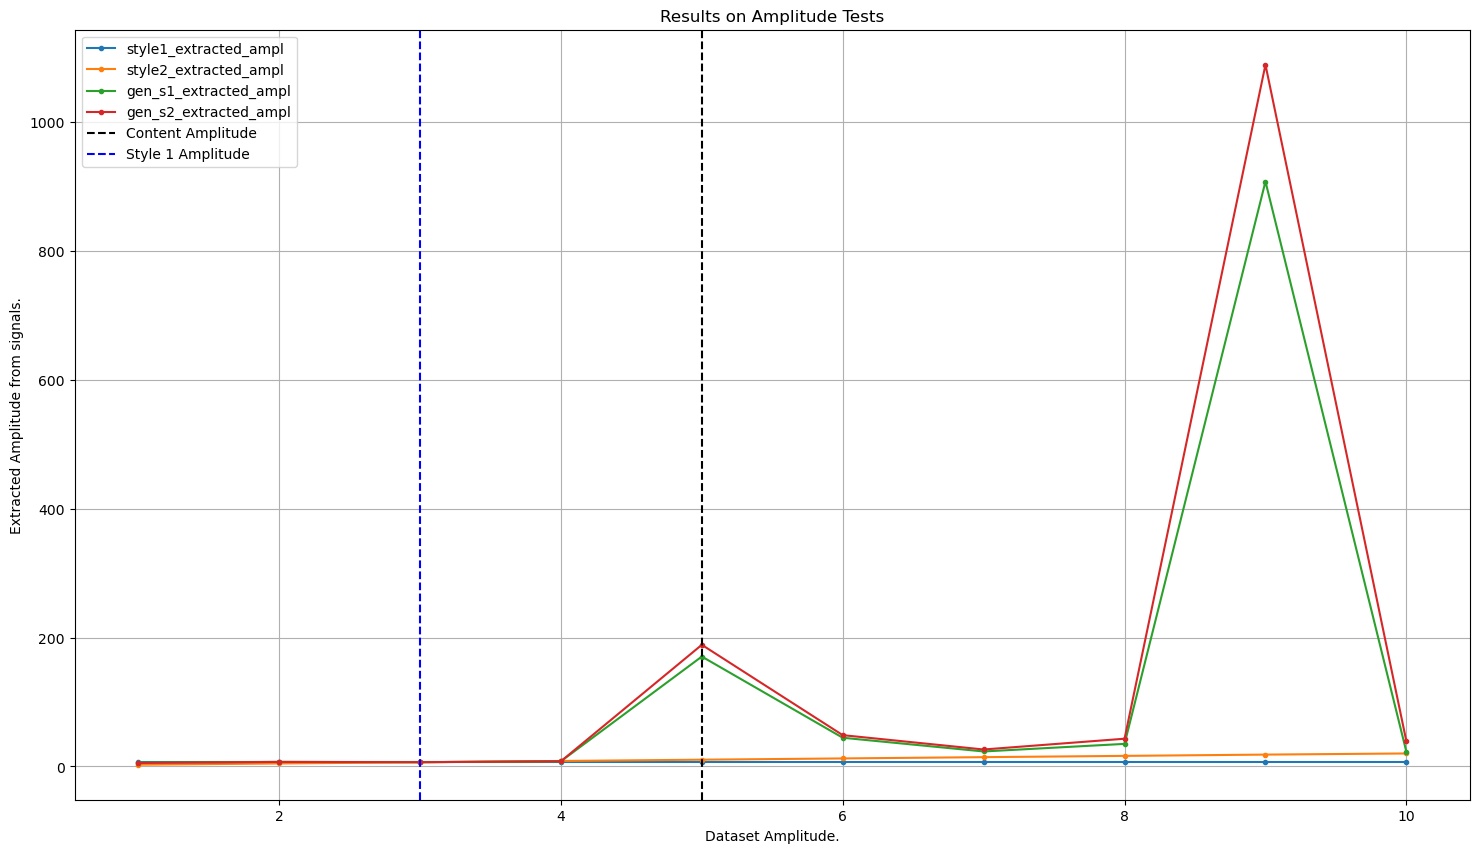

In [6]:
plot_results(
    agreggated_amplitudes, 
    ampl_labels, 
    title="Results on Amplitude Tests",
    xlabel="Dataset Amplitude.",
    ylabel="Extracted Amplitude from signals.",
    content_line=5, content_label="Content Amplitude",
    style1_line=3, style1_label='Style 1 Amplitude')

## Output Noise

In [7]:
exp_type = "output_noise"

out_noise_folder_names = [f"{0.25* (nb+1):0.2f}" for nb in range(10)]

on_labels = ["style1_extracted_noise", "style2_extracted_noise", "gen_s1_extracted_noise", "gen_s2_extracted_noise"]

outpout_noise_df = extract_results(out_noise_folder_names, exp_type)
agg_out_noise_result = aggretate_results(outpout_noise_df, out_noise_folder_names)
agg_out_noise_result.index = agg_out_noise_result.index.astype(np.float32)

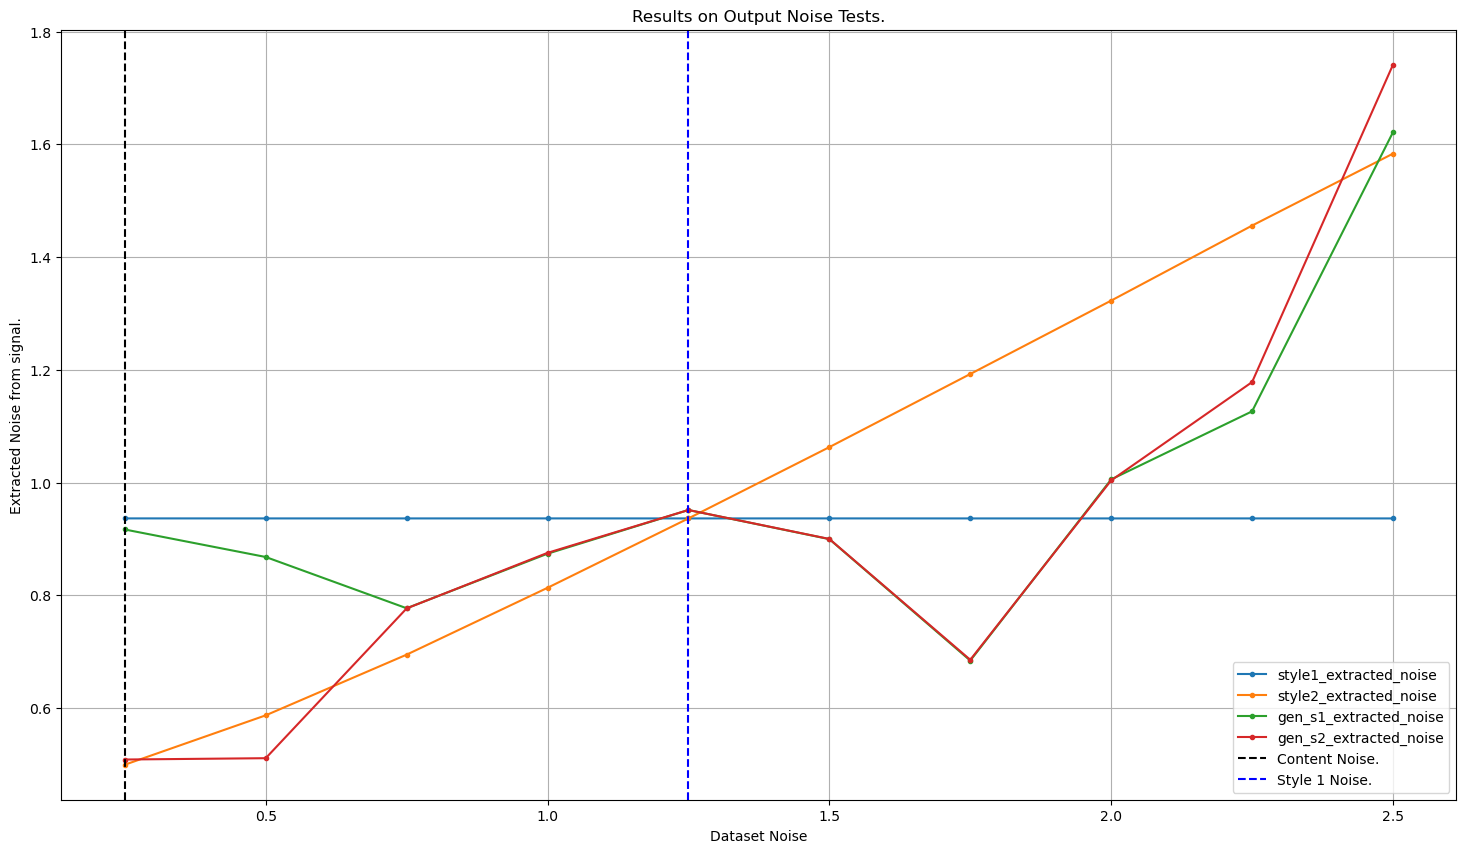

In [8]:
plot_results(
    agg_out_noise_result, 
    on_labels, 
    title="Results on Output Noise Tests.",
    xlabel="Dataset Noise",
    ylabel="Extracted Noise from signal.",
    content_line=0.25, content_label="Content Noise.",
    style1_line=1.25, style1_label='Style 1 Noise.')

## Time Shift

In [9]:
exp_type = "time_shift"
time_shift_folder_names = [f"{nb*2:0.0f}" for nb in range(0, 10)]

ts_labels = ["real_s1_shifts", "real_s2_shifts", "fake_s1_shifts", "fake_s2_shifts"]

time_shift_results = extract_results(time_shift_folder_names, exp_type)
agg_ts_results = aggretate_results(time_shift_results, time_shift_folder_names, [2, 3, 4])
agg_ts_results.index = agg_ts_results.index.astype(int)
agg_ts_results = agg_ts_results.sort_index()

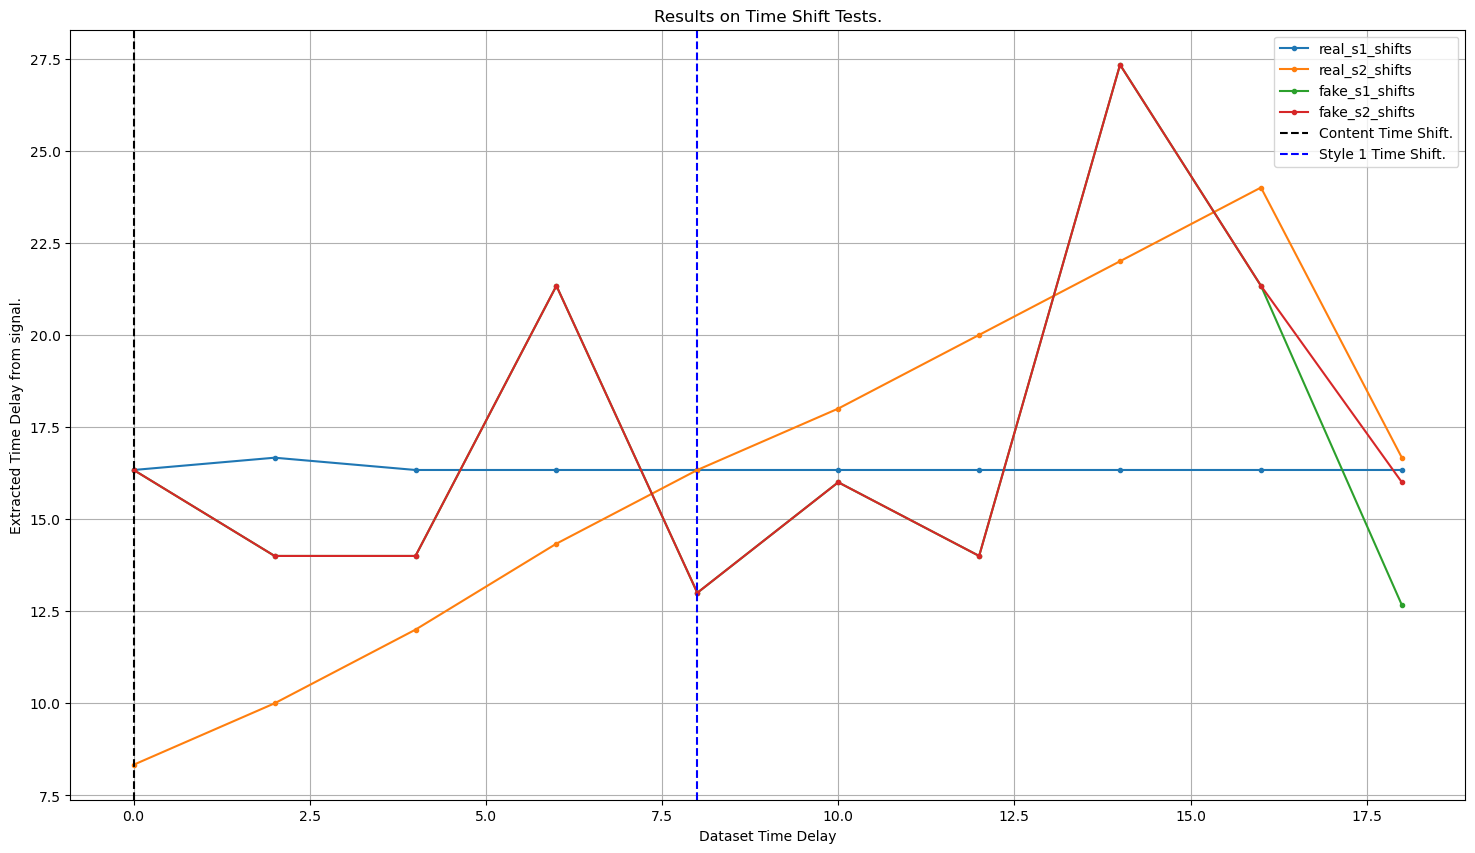

In [10]:
plot_results(
    agg_ts_results, 
    ts_labels,
    title="Results on Time Shift Tests.",
    xlabel="Dataset Time Delay",
    ylabel="Extracted Time Delay from signal.",
    content_line=0.0, content_label="Content Time Shift.",
    style1_line=8, style1_label='Style 1 Time Shift.'
    )

# Compare With Previous experiments
## Time Shift


In [19]:
ts_labels = ["real_s1_shifts", "real_s2_shifts", "fake_s1_shifts", "fake_s2_shifts"]

old_ts_folder_names = [f"{nb*2:0.0f}" for nb in range(0, 10)]

old_ts_exp = extract_results(old_ts_folder_names, "time_shift", "EXPS/EXP_2024-08-10_Improved architecture")
old_ts_exp = aggretate_results(old_ts_exp, old_ts_folder_names)

old_ts_exp.index = old_ts_exp.index.astype(int)
old_ts_exp = old_ts_exp.sort_index()

ts_labels = ["real_s1_shifts", "real_s2_shifts", "fake_s1_shifts", "fake_s2_shifts"]


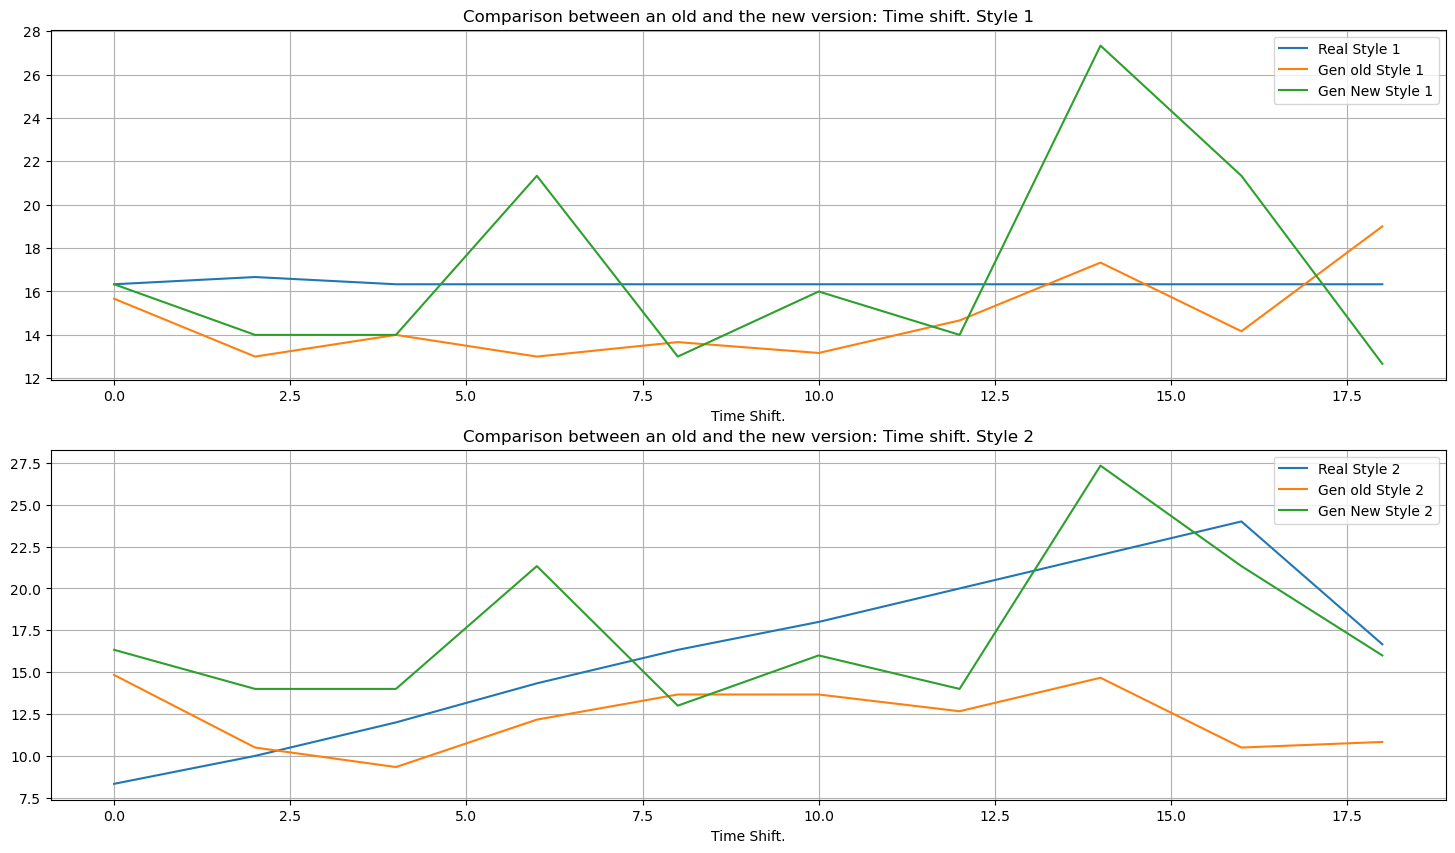

In [20]:
plt.figure(figsize=(18, 10))
ax = plt.subplot(211)
ax.set_title("Comparison between an old and the new version: Time shift. Style 1")

agg_ts_results["real_s1_shifts"].plot(ax=ax)
old_ts_exp["fake_s1_shifts"].plot(ax=ax)
agg_ts_results["fake_s1_shifts"].plot(ax=ax)

ax.set_xlabel("Time Shift.")

plt.legend(["Real Style 1", "Gen old Style 1", "Gen New Style 1"])
ax.grid(True)

ax = plt.subplot(212)
ax.set_title("Comparison between an old and the new version: Time shift. Style 2")

agg_ts_results["real_s2_shifts"].plot(ax=ax)
old_ts_exp["fake_s2_shifts"].plot(ax=ax)
agg_ts_results["fake_s2_shifts"].plot(ax=ax)

ax.set_xlabel("Time Shift.")

plt.legend(["Real Style 2", "Gen old Style 2", "Gen New Style 2"])
ax.grid(True)

plt.show()

## Output Noise

In [15]:
exp_type = "output_noise"

on_labels = ["style1_extracted_noise", "style2_extracted_noise", "gen_s1_extracted_noise", "gen_s2_extracted_noise"]

old_output_noise = extract_results(out_noise_folder_names, exp_type, "EXPS/EXP_2024-07-26_final_experiment")
old_output_noise = aggretate_results(old_output_noise, out_noise_folder_names)
old_output_noise.index = old_output_noise.index.astype(np.float32)

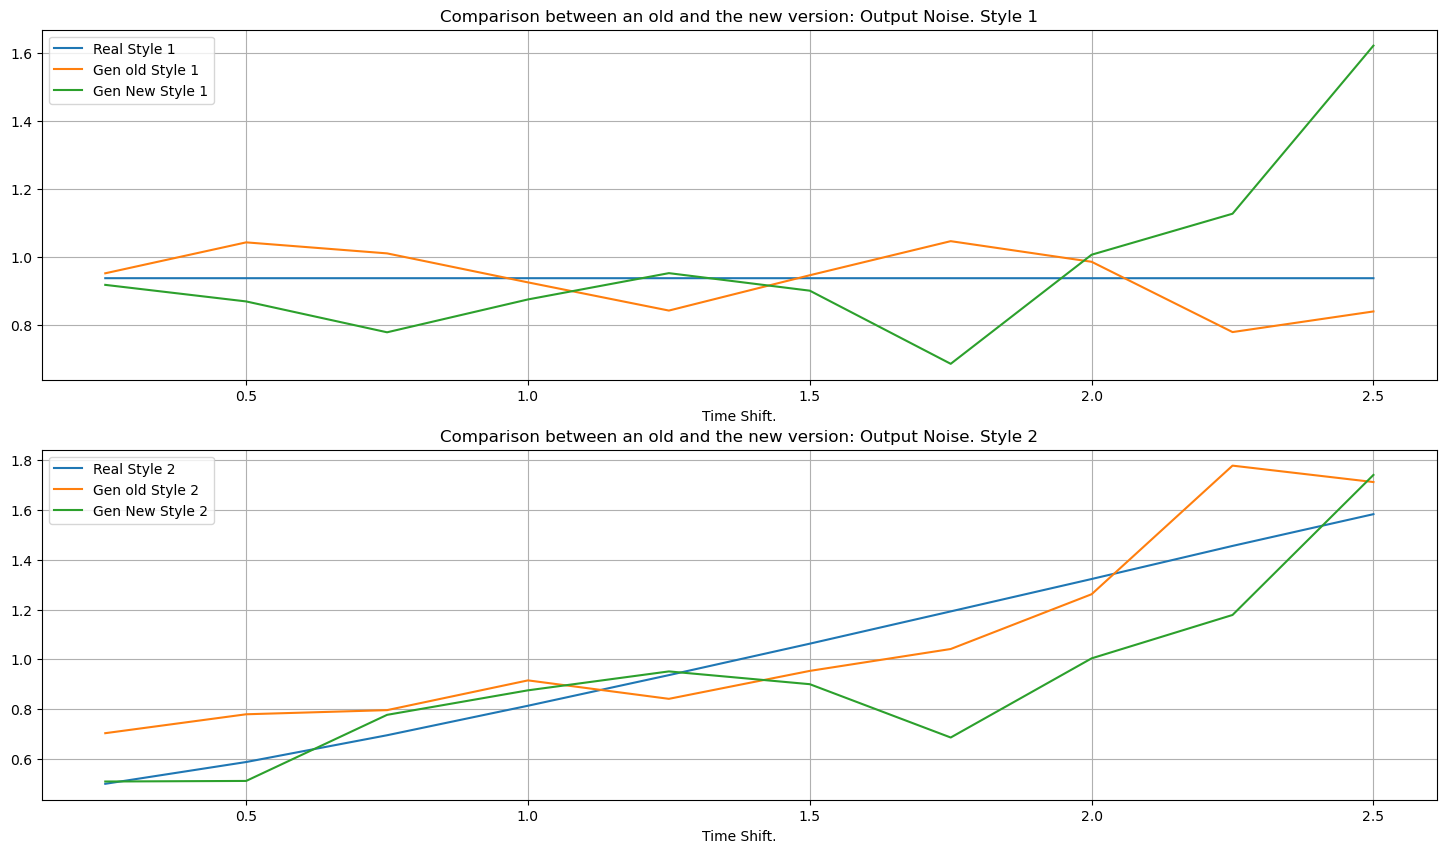

In [16]:
plt.figure(figsize=(18, 10))
ax = plt.subplot(211)
ax.set_title("Comparison between an old and the new version: Output Noise. Style 1")

agg_out_noise_result["style1_extracted_noise"].plot(ax=ax)
old_output_noise["gen_s1_extracted_noise"].plot(ax=ax)
agg_out_noise_result["gen_s1_extracted_noise"].plot(ax=ax)

ax.set_xlabel("Time Shift.")

plt.legend(["Real Style 1", "Gen old Style 1", "Gen New Style 1"])
ax.grid(True)

ax = plt.subplot(212)
ax.set_title("Comparison between an old and the new version: Output Noise. Style 2")

agg_out_noise_result["style2_extracted_noise"].plot(ax=ax)
old_output_noise["gen_s2_extracted_noise"].plot(ax=ax)
agg_out_noise_result["gen_s2_extracted_noise"].plot(ax=ax)

ax.set_xlabel("Time Shift.")


plt.legend(["Real Style 2", "Gen old Style 2", "Gen New Style 2"])
ax.grid(True)

plt.show()

## Amplitude

In [17]:
exp_type = "amplitude_shift"
amplitude_folder_names
on_labels = ["style1_extracted_noise", "style2_extracted_noise", "gen_s1_extracted_noise", "gen_s2_extracted_noise"]

old_amplitude = extract_results(amplitude_folder_names, exp_type, "EXPS/EXP_2024-07-26_final_experiment")
old_amplitude = aggretate_results(old_amplitude, amplitude_folder_names, [0, 1])

old_amplitude.index = old_amplitude.index.str.split("_").map(lambda i: float(i[0]))
old_amplitude = old_amplitude.sort_index() 

ampl_labels = ["style1_extracted_ampl", "style2_extracted_ampl", "gen_s1_extracted_ampl", "gen_s2_extracted_ampl"]


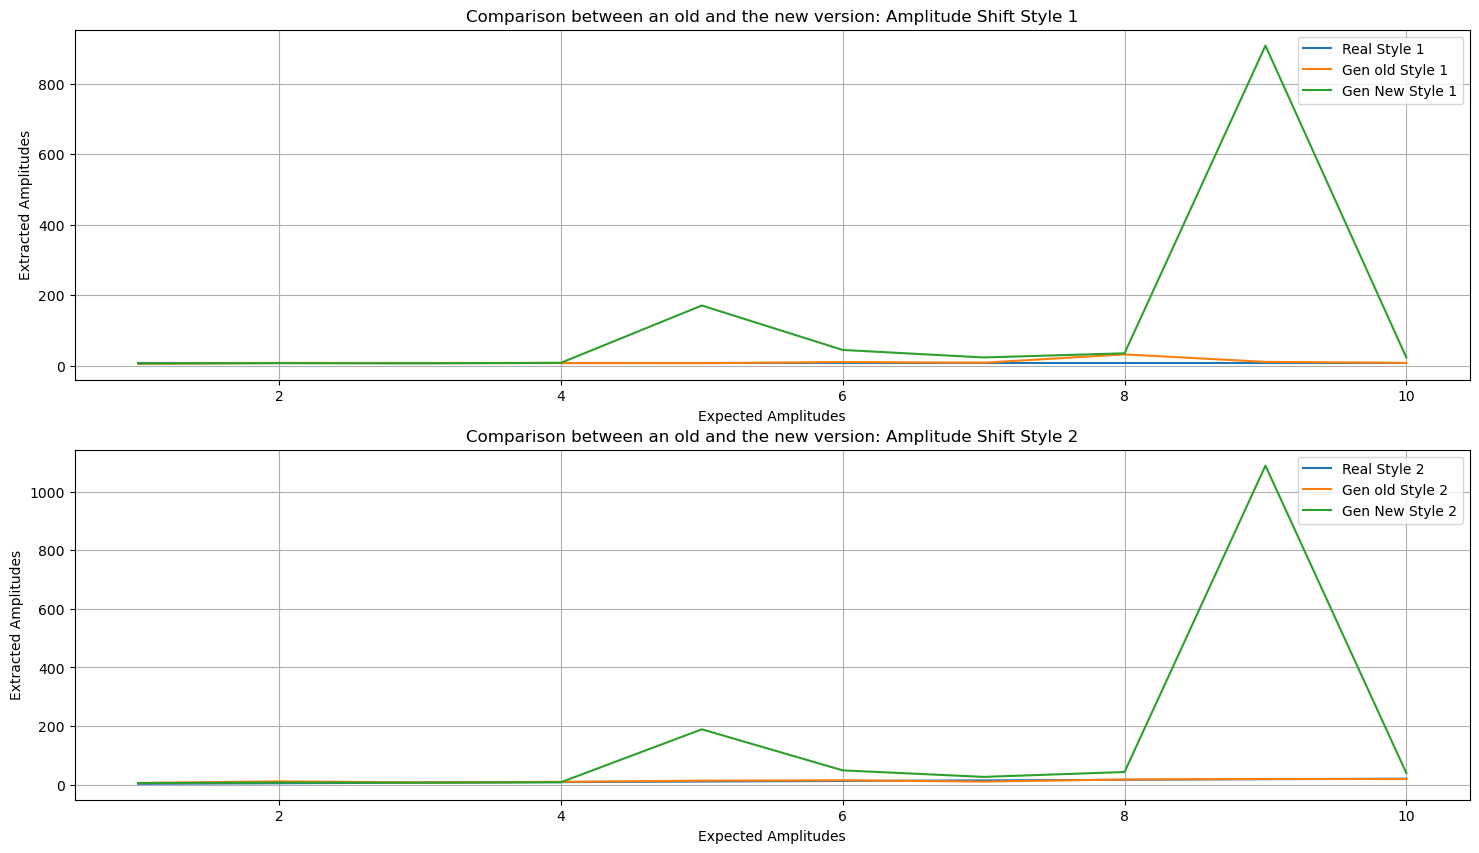

In [18]:
plt.figure(figsize=(18, 10))
ax = plt.subplot(211)
ax.set_title("Comparison between an old and the new version: Amplitude Shift Style 1")

agreggated_amplitudes["style1_extracted_ampl"].plot(ax=ax)
old_amplitude["gen_s1_extracted_ampl"].plot(ax=ax)
agreggated_amplitudes["gen_s1_extracted_ampl"].plot(ax=ax)

ax.set_xlabel("Expected Amplitudes")
ax.set_ylabel("Extracted Amplitudes")

plt.legend(["Real Style 1", "Gen old Style 1", "Gen New Style 1"])
ax.grid(True)

ax = plt.subplot(212)
ax.set_title("Comparison between an old and the new version: Amplitude Shift Style 2")

agreggated_amplitudes["style2_extracted_ampl"].plot(ax=ax)
old_amplitude["gen_s2_extracted_ampl"].plot(ax=ax)
agreggated_amplitudes["gen_s2_extracted_ampl"].plot(ax=ax)

ax.set_xlabel("Expected Amplitudes")
ax.set_ylabel("Extracted Amplitudes")


plt.legend(["Real Style 2", "Gen old Style 2", "Gen New Style 2"])
ax.grid(True)

plt.show()